In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./CSV/uber_new_data1.csv")
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,66.659021
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,86.047484
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,24.440000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,42.300000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000,75.340000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2266.840000


In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_date,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,52238368,26:00.0,9.3,1/1/2009,11:52,-73.945648,40.801802,-73.970920,40.762820,1,91.90
1,25687629,18:00.0,3.7,1/1/2009,12:52,-74.008845,40.708023,-74.010642,40.711428,1,7.61
2,8688426,05:03.0,10.6,1/1/2009,15:52,-73.956635,40.771254,-73.991528,40.749778,2,80.90
3,11751645,02:00.0,5.7,1/1/2009,12:52,-74.005077,40.720650,-73.986923,40.715958,2,36.85
4,3587367,25:00.0,17.3,1/1/2009,20:52,-73.978850,40.761850,-74.007757,40.705293,1,125.54


In [4]:
df.size

2200000

In [5]:
main_data = df.drop(['Unnamed: 0', 'key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1)

In [6]:
main_data = main_data.drop(main_data[(main_data['distance'] == 0) | (main_data['passenger_count'] == 0) | (main_data['fare_amount'] == 0)].index)

In [7]:
main_data.head()

,fare_amount,pickup_date,pickup_time,passenger_count,distance
0,9.3,1/1/2009,11:52,1,91.90
1,3.7,1/1/2009,12:52,1,7.61
2,10.6,1/1/2009,15:52,2,80.90
3,5.7,1/1/2009,12:52,2,36.85
4,17.3,1/1/2009,20:52,1,125.54


In [8]:
main_data.isnull()
main_data = main_data.dropna(axis=0)

In [9]:
map_data = main_data.drop(['fare_amount','pickup_date','pickup_time'], axis=1)

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(map_data, main_data.fare_amount )

LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(map_data,main_data.fare_amount, test_size=0.25)

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
price_predict = model.predict(x_test)

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,price_predict)
mse = mean_squared_error(y_test, price_predict)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)
linear_regression = model.score(x_test, y_test)
print("Training set score: {:.2f}".format(model.score(x_train, y_train)))
print("Test set score: {:.7f}".format(linear_regression))

2.718767119462923
43.268615842564
6.577888403018403
Training set score: 0.61
Test set score: 0.5351240


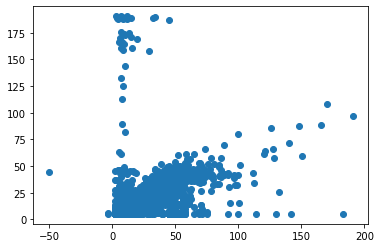

In [15]:
import matplotlib.pyplot as plt
plt.scatter( y_test, price_predict)

In [16]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [17]:
y_pred = model2.predict(x_test)

In [18]:
print("Training set score: {:.2f}".format(model2.score(x_train, y_train)))
print("Test set score: {:.7f}".format(model2.score(x_test, y_test)))

Training set score: 0.89
Test set score: 0.6338824


In [19]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

2.844156886426671
34.07661184784715
5.837517610067412


In [20]:
decision_tree = model2.score(x_test,y_test)
decision_tree

0.6338824306869173

In [21]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
RandomForestRegressor()

RandomForestRegressor()

In [23]:
y_predi = model3.predict(x_test)

In [24]:
print("Training set score: {:.2f}".format(model3.score(x_train, y_train)))
print("Test set score: {:.7f}".format(model3.score(x_test, y_test)))

Training set score: 0.87
Test set score: 0.7162231


In [25]:
mae=mean_absolute_error(y_test,y_predi)
mse=mean_squared_error(y_test,y_predi)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

2.6033727989510993
26.412707374040192
5.139329467356631


In [26]:
random_forest = model3.score(x_test,y_test)
random_forest

0.7162230721194114

In [27]:
print("Linear Regression=",linear_regression)
print("Decision_tree=",decision_tree)
print("Random forest=",random_forest)

Linear Regression= 0.5351239574358715
Decision_tree= 0.6338824306869173
Random forest= 0.7162230721194114


In [28]:
import pickle
fp=open("model.obj","wb")
pickle.dump(model,fp)
fp.close()